# グラフ構造の諸指標

In [1]:
import numpy as np
import networkx as nx

%matplotlib inline

In [2]:
DRAW_CONFIG = {
    'node_color': 'white',
    'edgecolors': 'black', # line color of nodes
    'with_labels': True,
    'node_size': 600,
    'font_size': 14,
    'font_family': 'Arial',
}

## グラフの大きさ

### グラフに含まれるノード数

グラフの大きさを示す最も単純な指標はノード数である．
グラフ$G$のノード集合$V$のとき，ノード数は$|V|$と表記する．

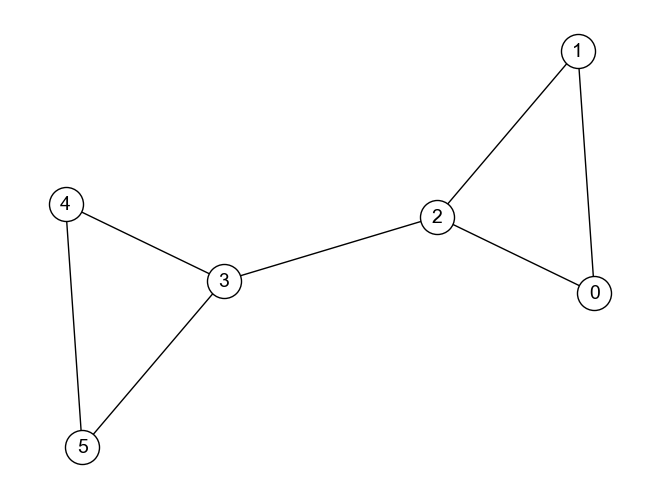

In [3]:
G_barbell = nx.barbell_graph(3, 0)
nx.draw(G_barbell, **DRAW_CONFIG)

上記グラフ$G_{barbell}$のノード数は6である．
これをNetworkXで求めるには以下のように書く．

In [4]:
# 上記グラフを定義
G_barbell = nx.barbell_graph(3, 0)

# ノード数
V = G_barbell.nodes() # ノードを求める
len(V) # ノード集合の大きさ

# 以下でもOK
# G_barbell.number_of_nodes()

6

### 直径

グラフに属するノード間の距離の最大値をグラフの**直径（diameter）** と呼ぶ．
グラフの直径とは，最も離れているノード同士の距離である．

例えば，上図のグラフ$G_{barbell}$の直径は3となる．
それに対して，下図のグラフ$G_{complete}$の直径は1となる．

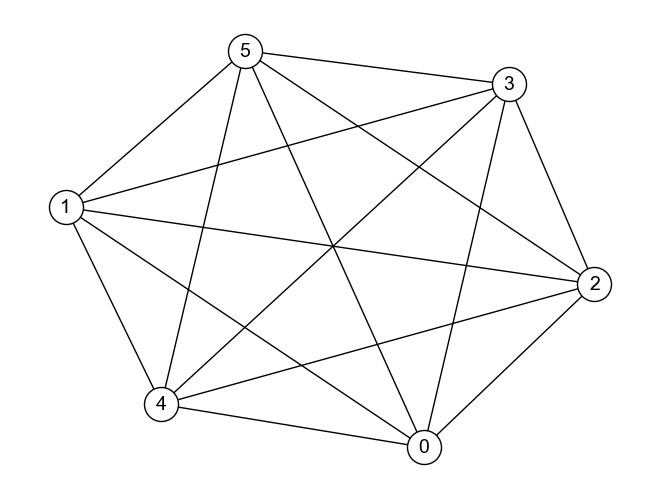

In [5]:
G_complete = nx.complete_graph(6)
pos = nx.spring_layout(G_complete, seed=123)
nx.draw(G_complete, pos, **DRAW_CONFIG)

グラフの直径を求めるにはNetworkXの`diameter`関数を用いる．
以下は，上のグラフ$G_{complete}$の直径を求めるコードである．

In [6]:
# 上記グラフを定義
G_complete = nx.complete_graph(6)

# 直径
nx.diameter(G_complete)

1

以下のグラフ$G_{cycle}$の直径はいくつだろうか．
直径は3である．
コードを書いたらすぐに求まるが，頭の中でなぜ直径が3になるか確認してみよう．

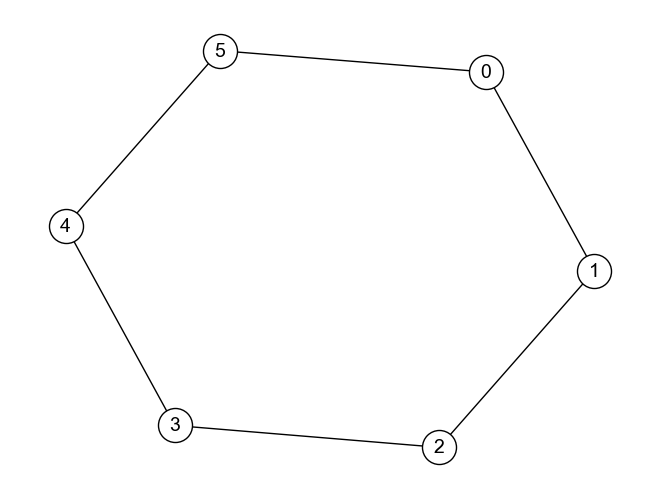

In [7]:
G_cycle = nx.cycle_graph(6)
nx.draw(G_cycle, **DRAW_CONFIG)

### （ノードの）離心数

**離心数（eccentricity）** とはノードに定義される指標で，グラフ$G$に属するノード$n$に着目した際，$n$から$G$中の他のノードへの距離の最大値を表す．
例えば，以下のグラフにおいて
- ノード0の離心数は3
- ノード2の離心数は2

となる．
ちなみに，グラフの直径は「グラフに属するノードの離心数の最大値」と言い換えることができる．

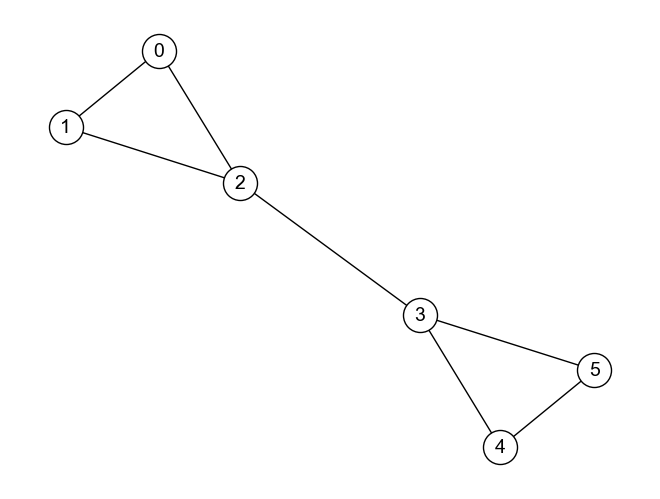

In [8]:
nx.draw(G_barbell, **DRAW_CONFIG)

NetworkXで離心数を求めるには`eccentricity`関数を用いる．
以下は，上のグラフ$G_{barbell}$の全ノードの離心数を求めるコードである．

In [9]:
nx.eccentricity(G_barbell)

{0: 3, 1: 3, 2: 2, 3: 2, 4: 3, 5: 3}

### 半径
グラフの**半径（radius）** とは，グラフに属するノードの離心数の最小値を表す．
直径は離心数の「最大値」に着目しているのに注意しよう．

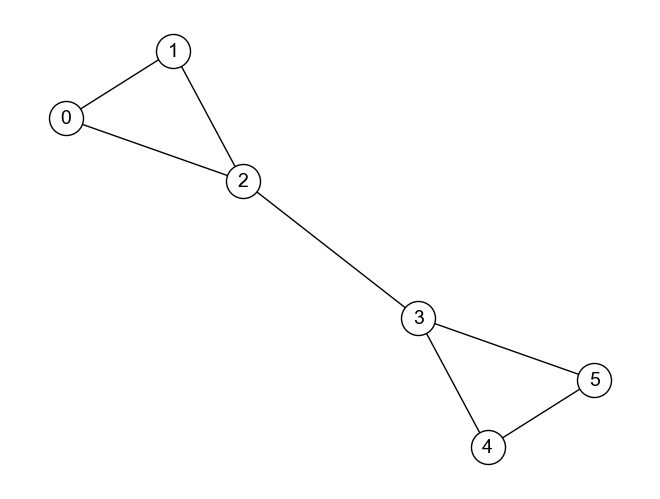

In [10]:
nx.draw(G_barbell, **DRAW_CONFIG)

上のグラフ$G_{barbell}$の半径を考えてみよう．
離心数の分布を調べると分かるように，ノード2からノード4への経路の距離が2となり，この値がグラフ$G_{barbell}$における最小の離心数となる．
よって，$G_{barbell}$の半径は2である（直径は3）．

グラフの半径をNetworkXで求めるには`radius`関数を用いる．
以下，上のグラフ$G_{barbell}$の半径を求めるコードである．

In [11]:
nx.radius(G_barbell)

2

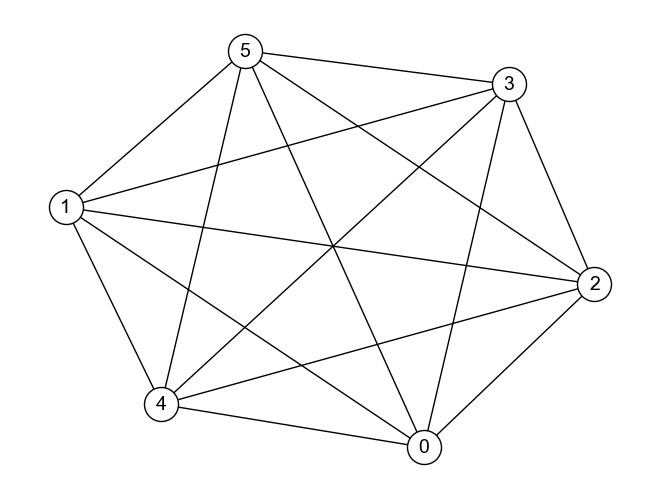

In [12]:
G_complete = nx.complete_graph(6)
pos = nx.spring_layout(G_complete, seed=123)
nx.draw(G_complete, pos, **DRAW_CONFIG)

上記グラフ$G_{complete}$の半径はいくつだろうか？答えは1である（直径は1）．
グラフによって直径と半径が異なるものもあれば，同じものもあるので注意しよう．

## 密度

グラフ中の各ノードが他のノードとどの程度密に繋がっているかを定量化するには，密度を使う．
グラフの**密度（density）** とは，グラフ中のノード間に張ることのできるすべての辺に対する，実際の辺の数の割合である．

グラフ$G$のノード集合を$V$，エッジの集合を$E$とする．
仮に$G$中のすべてのノード同士が接続されていれば，エッジの総数は${}_{|V|} C_2$通りになるので，グラフ$G$の密度は以下で計算できる．

$$
density = \frac{|E|}{{}_{|v|} \mathrm{C}_k}
=\frac{2 |E|}{|V|(|V|-1)}
$$

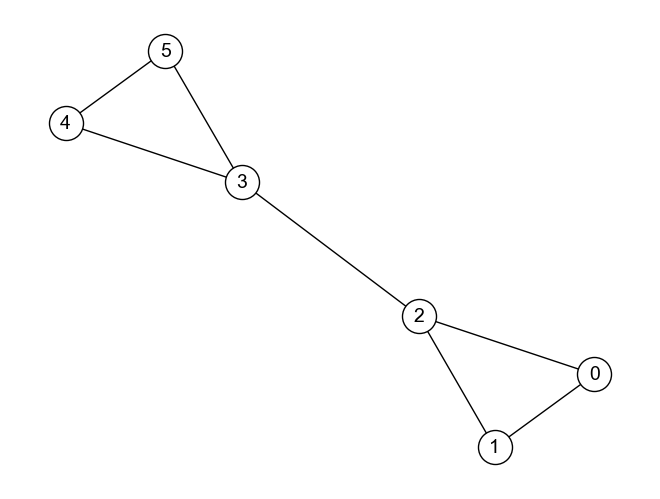

In [13]:
nx.draw(G_barbell, **DRAW_CONFIG)

上のグラフ$G_{barbell}$の密度を計算してみよう．
グラフ$G_{barbell}$のノード数は6，エッジ数は7である．
よって$G_{barbell}$の密度は$\frac{7}{{}_6 C_2}$となる．

グラフの密度をNetworkXで求めるには`density`関数を用いる．
以下は，$G_{barbell}$の密度を求めるコードである．

In [14]:
nx.density(G_barbell)

0.4666666666666667

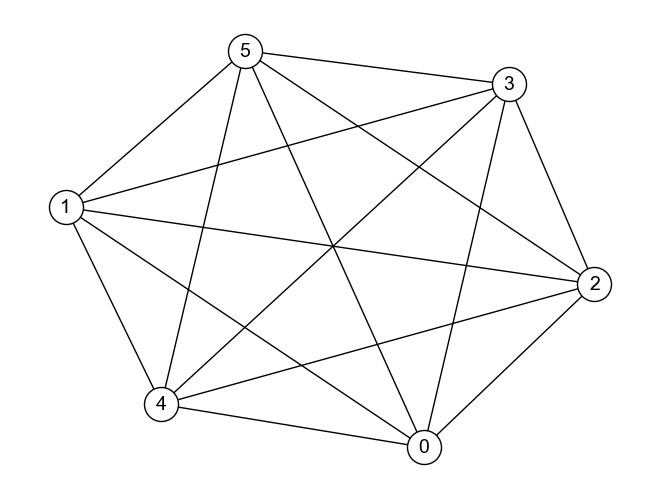

In [15]:
G_complete = nx.complete_graph(6)
pos = nx.spring_layout(G_complete, seed=123)
nx.draw(G_complete, pos, **DRAW_CONFIG)

上記グラフ$G_{complete}$の密度はいくつだろうか？
このグラフはすべてのノード同士が接続されている．
よって，グラフ$G_{complete}$の密度は1となる．

このように，すべてのノード同士が接続されているグラフ（つまり密度が1）のグラフは**完全グラフ（complete graph）** と呼ばれる．

## 連結性

グラフ中の任意のノード間に経路が存在するとき，つまりどのノードの間にも経路が存在するとき，そのグラフを**連結グラフ（connected graph）** と呼ぶ．
例えば，以下のグラフは連結グラフである．

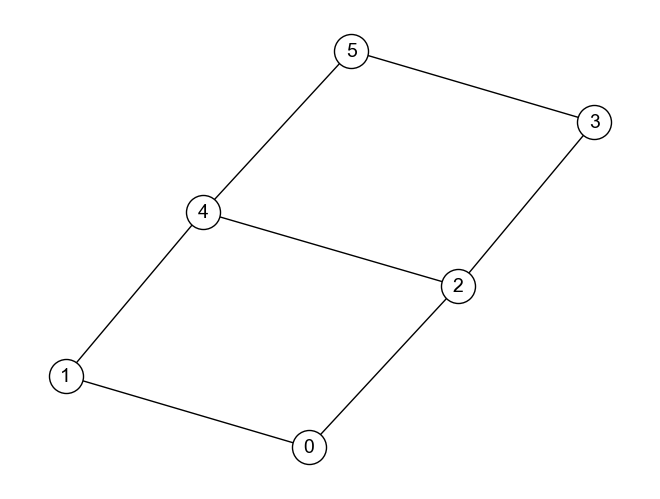

In [16]:
G_connected = nx.Graph()
G_connected.add_nodes_from([0, 1, 2, 3, 4, 5])
G_connected.add_edges_from(
    [(0, 1), (0, 2), (2, 3), (1, 4), (2, 4), (3, 5), (4, 5)]
)
pos = nx.spring_layout(G_connected, seed=123)
nx.draw(G_connected, pos, **DRAW_CONFIG)

一方，グラフ内に特定のノード間に経路が存在しない場合，そのグラフを非連結グラフと呼ぶ．
例えば，以下のグラフはノード1とノード2の間には経路が存在するものの，ノード0，3，4，5からノード1とノード2にたどり着く経路が存在しない．
よって，以下のグラフは非連結グラフである．

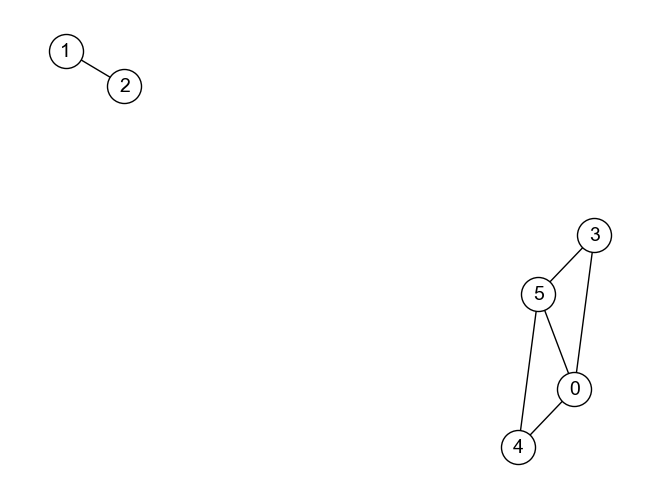

In [17]:
G_disconnected = nx.Graph()
G_disconnected.add_nodes_from([0, 1, 2, 3, 4, 5])
G_disconnected.add_edges_from(
    [(1, 2), (0, 3), (0, 5), (3, 5), (4, 5), (0, 4)]
)
pos = nx.spring_layout(G_disconnected, seed=123)
nx.draw(G_disconnected, pos, **DRAW_CONFIG)

NetworkXでグラフが連結グラフであるか否かを調べるには，`is_conncected`関数を用いる．
以下は，上記グラフが連結グラフかどうかを調べるコードである．

In [18]:
# グラフを定義しておく
G_disconnected = nx.Graph()
G_disconnected.add_nodes_from([0, 1, 2, 3, 4, 5])
G_disconnected.add_edges_from(
    [(1, 2), (0, 3), (0, 5), (3, 5), (4, 5), (0, 4)]
)

# 連結グラフであればTrue，そうでなければFalseが返ってくる
nx.is_connected(G_disconnected)

False

グラフが有向グラフの場合，より厳密な連結性を定義できる．
以下のグラフ$G_wc$を見てみよう．
このグラフは無向グラフならば連結グラフであるが，有向グラフとしてみるとノード0からノード1にたどり着ける経路が存在しない．
このようなグラフを**弱連結グラフ（weakly-connected graph）** と呼ぶ．

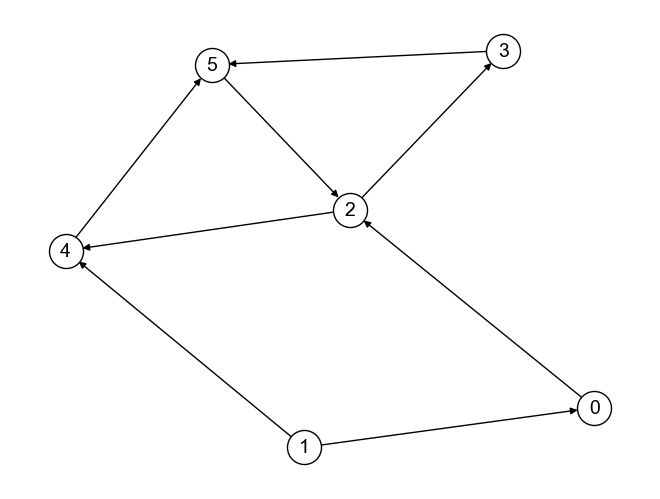

In [19]:
G_weakly_connected = nx.DiGraph()
G_weakly_connected.add_nodes_from([0, 1, 2, 3, 4, 5])
G_weakly_connected.add_edges_from(
    [(1, 0), (0, 2), (1, 4), #(4, 1),
     (2, 3), (2, 4), (3, 5), (4, 5), (5, 2)]
)
pos = nx.spring_layout(G_weakly_connected, seed=123)
nx.draw(G_weakly_connected, pos, **DRAW_CONFIG)

次に以下のグラフ$G_sc$を見てみよう．
このグラフは先のグラフ$G_wc$とは異なり，ノード0からノード1にたどり着ける経路が存在する．
また，どのノードからも他のノードにたどり着くことができる．
このように，有向グラフ中の任意のノード間に有効経路が存在するとき，そのグラフを**強連結グラフ（strongly-connected graph）** と呼ぶ．

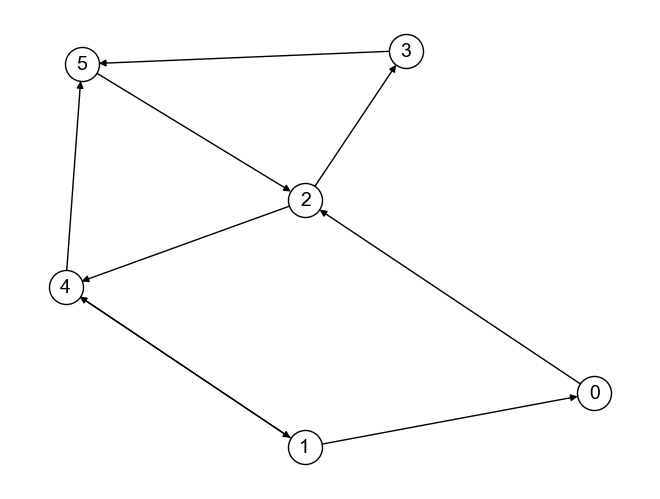

In [20]:
G_strongly_connected = nx.DiGraph()
G_strongly_connected.add_nodes_from([0, 1, 2, 3, 4, 5])
G_strongly_connected.add_edges_from(
    [(1, 0), (0, 2), (1, 4), (4, 1),
     (2, 3), (2, 4), (3, 5), (4, 5), (5, 2)]
)
pos = nx.spring_layout(G_strongly_connected, seed=123)
nx.draw(G_strongly_connected, pos, **DRAW_CONFIG)

NetworkXでグラフが強連結グラフであるかを調べるには`is_strongly_connected`関数を使う．
以下は，上のグラフ$G_{sc}$が強連結グラフであるかを調べるコードである．

In [21]:
# グラフを定義しておく
G_sc = nx.DiGraph()
G_sc.add_nodes_from([0, 1, 2, 3, 4, 5])
G_sc.add_edges_from(
    [(1, 0), (0, 2), (1, 4), (4, 1),
     (2, 3), (2, 4), (3, 5), (4, 5), (5, 2)]
)

# 強連結グラフであればTrue，そうでなければFalseが返ってくる
nx.is_strongly_connected(G_sc)

True

## 次数分布

ノードに接続しているエッジの数は**次数（degree）** と呼ばれる．
例えば，以下のグラフにおけるノード2の次数は3である．
また，ノード3の次数は2であり，ノード4の次数は1である．

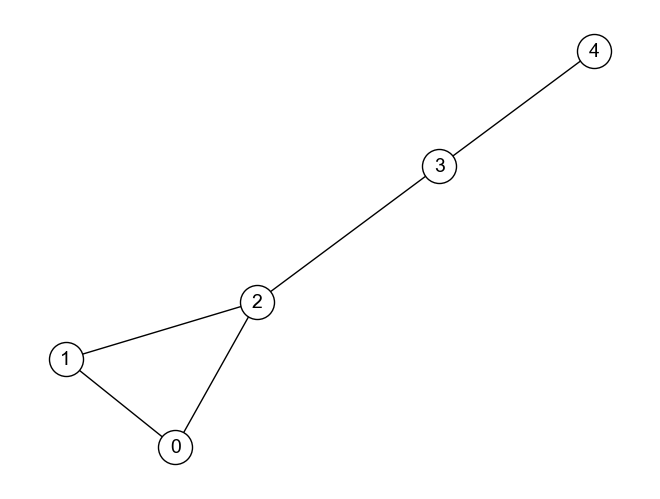

In [22]:
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 2), (2, 3), (3, 4)])
nx.draw(G, **DRAW_CONFIG)

ちなみに，NetworkXを用いてノードの次数を調べるには`degree`メソッドを用いる．
以下は，上記グラフ$G$におけるノード3の次数を調べるコードである．

In [23]:
# グラフを定義しておく
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 2), (2, 3), (3, 4)])

# 次数の取得
G.degree[3]

2

グラフ中のノードの次数分布を調べることは，グラフの特徴を理解する上で有用である．
グラフのノード数や密度が同じでも，次数の分布が異なることもありえる．
例えば，以下のグラフ$G_a$を見てみよう．

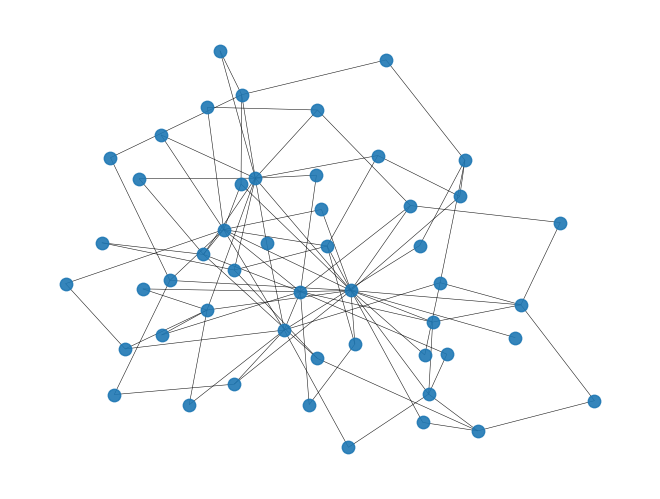

In [24]:
# 隣接行列データからグラフを読み込む
G_a = nx.read_adjlist("data/degree-distribution/graph_a.adjlist")
nx.draw(G_a, node_size=80, width=0.4, alpha=0.9)

このグラフ$G_a$のノード数は50，密度は0.078である．
では，$G_a$の次数の分布を見てみよう．
以下はグラフ$G_a$のすべてのノードの次数を調べて，その分布をヒストグラムとして可視化するコードである．

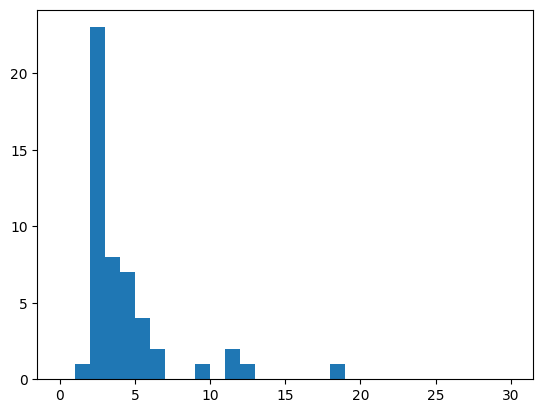

In [25]:
# 可視化のためのライブラリをインポート
import matplotlib.pyplot as plt

# 各次数の値をdegrees_G_aリストに格納する
degrees_G_a = []
for node, degree in G_a.degree:
    degrees_G_a.append(degree)

# 次数のヒストグラムを表示
plt.hist(degrees_G_a, range=(0, 30), bins=30);

ヒストグラムを見ると，大半のノードはその次数が2〜3であるが，次数が10を超えるノードも数個あることが分かる．

続いて以下のグラフを見てみよう．

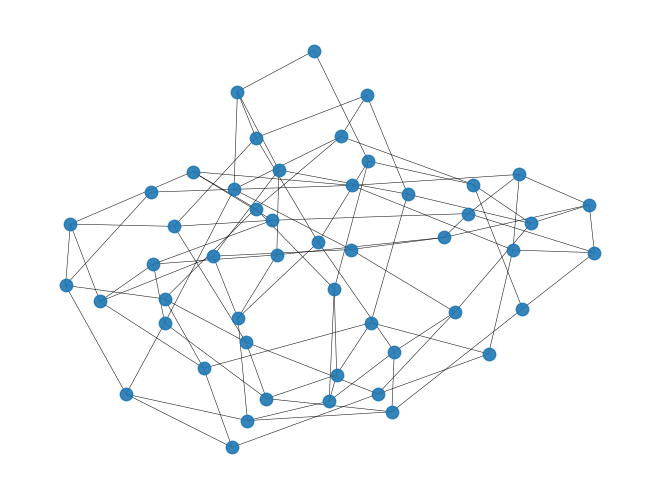

In [26]:
# 隣接行列データからグラフを読み込む
G_b = nx.read_adjlist("data/degree-distribution/graph_b.adjlist")
nx.draw(G_b, node_size=80, width=0.4, alpha=0.9)

$G_a$と同様に，このグラフ$G_b$のノード数は50，密度は0.078である．
では，$G_b$の次数の分布を見てみよう．

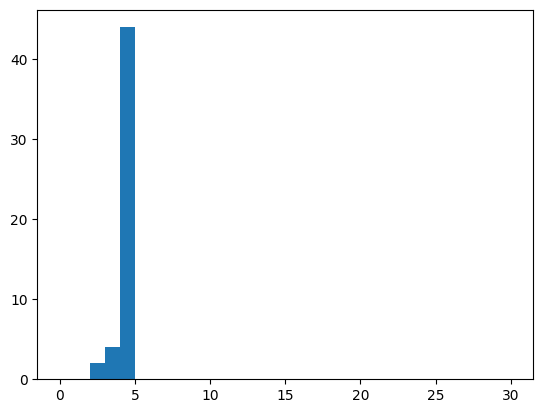

In [27]:
# 各次数の値をdegrees_G_bリストに格納する
degrees_G_b = []
for node, degree in G_b.degree:
    degrees_G_b.append(degree)

# 次数のヒストグラムを表示
plt.hist(degrees_G_b, range=(0, 30), bins=30);

ヒストグラムを見ると，グラフ$G_b$のほぼ全てのノードの次数が4であり，それより大きな次数を持つノードは存在しないことが分かる．
このように，同じノード数，同じ密度を持つグラフでもグラフの性質がまったく異なることがある．

---

## クイズ

### Q: 研究者のネットワーク

科学研究費助成事業（略称「科研費」）は学術研究を格段に発展させることを目的とし，文部科学省および日本学術振興会が審査・交付を行っている競争的研究費である．
日本の大学研究者の多くは，科研費を獲得・活用して研究活動を行っている．
科研費に採択された研究プロジェクトについては[科学研究費助成事業データベース](https://kaken.nii.ac.jp/ja/)に公開されており，プロジェクトの概要やプロジェクトに関わる研究者を確認することができる．

コチラからダウンロードできるファイルは，2025年4月1日の時点で[科学研究費助成事業データベース]から取得した一部のデータを圧縮したものである．
解凍後に得られる6つのファイルは，ある審査区分（研究分野）の採択プロジェクトに携わったことのある研究者同士の共同研究関係を（NetworkXの）隣接行列形式で保存したファイルとなっている．
ファイルと対象としている審査区分の対応関係は以下の通り：
- `collaboration_db.adjlist`: 「データベース関連」分野
- `collaboration_hci.adjlist`: 「ヒューマンインタフェースおよびインタラクション関連」分野
- `collaboration_eme.adjlist`: 「電気電子材料工学関連」分野
- `collaboration_mb.adjlist`: 「分子生物学関連関連」分野
- `collaboration_ps.adjlist`: 「宇宙惑星科学関連」分野
- `collaboration_jh.adjlist`: 「日本史関連」分野

上記ファイルをNetworkXライブラリを使って読み込み，各研究分野の共同研究者ネットワークを示すグラフを可視化しなさい．
また，各グラフの
- ノード数
- 密度
- 直径
- 次数の平均値

を比較しなさい．

なお，NetworkXを用いて`xxx.adjlist`ファイルからグラフを読み込むには，以下のように


In [28]:
import networkx as nx

# data/kakendbディレクトリに保存したcollaboration_db.adjlistを読み込む
G_db = nx.read_adjlist("data/kakendb/collaboration_db.adjlist")